In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw07.ipynb")

# Support vector machines

Support vector machines have supplanted forms of linear learning due to their emphasis upon separating classes and manipulating that separation carefully. Let's study some limits of the model. 

In [2]:
# Run this first to load all libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm 

In [3]:
# Here's a simple visualizer.   
def make_meshgrid(x, y, h=1):
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, model, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)

def visualize(model, df):
    X = df.loc[:, ['x', 'y']].values
    y = df.loc[:, 'label'].values
    X0, X1 = X[:, 0], X[:, 1]
    fig, ax = plt.subplots()
    # plot contour lines for predictions 
    xx, yy = make_meshgrid(np.array([0, 100]), np.array([0, 500]), 1)
    plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=list(map(lambda x: 'b' if x<2 else 'r', y)))
    plt.show()

<!-- BEGIN QUESTION -->

*Question 1:* Consider the following data set:  

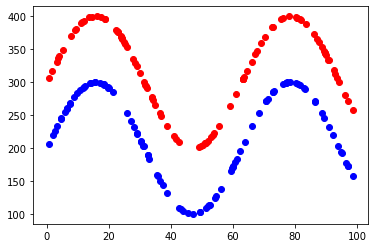

In [4]:
# Let's set up a very weird data set. 
def f1(x): 
    return np.sin(x/10) * 100 + 200
def f2(x): 
    return np.sin(x/10) * 100 + 300
np.random.seed(42)
x1 = np.random.uniform(0, 100, 100)
y1 = f1(x1)
x2 = np.random.uniform(0, 100, 100)
y2 = f2(x2)

df1 = pd.DataFrame({'x': x1, 'y': y1, 'label': 1})
df2 = pd.DataFrame({'x': x2, 'y': y2, 'label': 2})
df = pd.concat([df1, df2])

plt.plot(x1, y1, 'bo')
plt.plot(x2, y2, 'ro')                  

What decision function would optimally separate these populations? 

An RBF kernel function would optimally separate these populations because the 2 data are non-linearly separable. To improve the model for separating these populations, we can experiment on the gamma regularization which is the inverse of the radius of influence of samples selected by the model as support vectors; A higher Gamma will lead to more overfitting. In this case, gamma of 0.03 led to 4 classification errors.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 2:* Fit an `svm.SVC` model `model1` to this data. You may use any predefined kernel. You are allowed 5 classification errors. Try to make as few as possible. 

In [5]:
# make model1 a fitted model
model1 = svm.SVC(kernel = 'rbf', gamma = 0.03).fit(df.loc[:,['x', 'y']].values, df.loc[:, 'label'])
len(model1.support_vectors_)

142

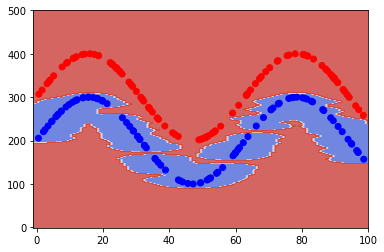

4 classification errors


In [6]:
visualize(model1, df)
import math
count = 0
for i in np.arange(0, 100):
    if model1.predict([[i, f1(i)]]) != [1]: 
        count += 1
for i in np.arange(0, 100):
    if model1.predict([[i, f2(i)]]) != [2]: 
        count += 1
print("{} classification errors".format(count))

In [7]:
grader.check("q2")

q2 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 3:* What are the obvious drawbacks to `model1`? 

Model1 shows severe over-fitting. The Gamma given was quite large, such that individual points have quite an effect upon fitting and so, we can see that it created 4 different groups (blue). This is a drawback because if we have a testing data point (e.g. about 25,270 = 2) near one of the trained points that has a high probability to be at a certain class will be exclused even though it logically should be included. Another drawback is that there are a lot of support vectors, 142 to be exact.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 4:* Consider the following data set:  

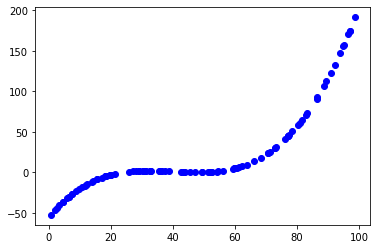

In [8]:
# Let's set up another very weird data set. 
def f3(x): 
    xtemp = (x - 50) / 10
    return xtemp*xtemp*xtemp + 3*xtemp*xtemp + xtemp
np.random.seed(42)
x3 = np.random.uniform(0, 100, 100)
y3 = f3(x3)

df3 = pd.DataFrame({'x': x3, 'y': y3})

plt.plot(x3, y3, 'bo')                  

What decision function would optimally identify this population of data points? 

The linear kernel function would optimally identify this population of data points. The data points all lie in a position such that they are on the right side of an upright sloping diagonal line. To improve the model for identifying these data points, we can experiment on the nu parameter that is an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. In this case, nu of 0.01 leads to 1 classification error.

<!-- END QUESTION -->



In [9]:
# let's create an appropriate visualizer for one-class SVM. 
def visualize_one(model, df):
    X = df.loc[:, ['x', 'y']].values
    X0, X1 = X[:, 0], X[:, 1]
    fig, ax = plt.subplots()
    # plot contour lines for predictions 
    xx, yy = make_meshgrid(X0, X1, 1)
    plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c='k')
    plt.show()

<!-- BEGIN QUESTION -->

*Question 5:* Fit a one-class SVC model `model2` to this data. You may use any predefined kernel.You are allowed up to 15 classification errors. 

In [10]:
# make model2 a fitted model
model2 = svm.OneClassSVM(kernel = 'linear', nu = 0.01).fit(df3)

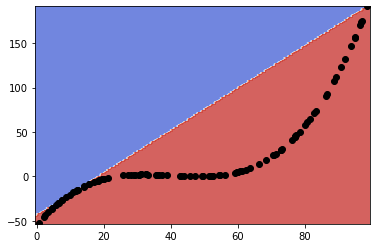

1 classification errors


In [11]:
visualize_one(model2, df3)
count = 0
for i in np.arange(0, 100):
    if model2.predict([[i, f3(i)]]) != [[1]]: 
        count += 1
print("{} classification errors".format(count))

In [12]:
grader.check("q5")

q5 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 6:* You might have noticed that I fixed the random seed -- and thus the example -- for these problems. What can happen randomly in problem 5 that I was trying to avoid? Demonstrate below. 

A random seed ensures that results are reproducible, such that anyone who re runs the code will get the exact same outputs. At problem 5, we are trying to avoid getting random values of x3 (and thus y3) everytime we run our code. The demo uses the f3 function of problem 5. The Demo without random seed showed that the 2 dataframes created are different because x4 and x5 are different; However, the Demo with random seed showed that the 2 dataframes are equal because x6 and x7 are equal.

Without Random Seed:
df4 = df5:
False


With Random Seed:
df6 = df7:
True


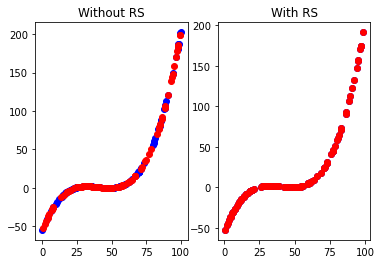

In [13]:
#DEMO without random seed
x4 = np.random.uniform(0, 100, 100)
y4 = f3(x4)
x5 = np.random.uniform(0, 100, 100)
y5 = f3(x5)

df4 = pd.DataFrame({'x': x4, 'y': y4})
df5 = pd.DataFrame({'x': x5, 'y': y5})

#DEMO with random seed
np.random.seed(42)
x6 = np.random.uniform(0, 100, 100)
y6 = f3(x6)
np.random.seed(42)
x7 = np.random.uniform(0, 100, 100)
y7 = f3(x7)

df6 = pd.DataFrame({'x': x6, 'y': y6})
df7 = pd.DataFrame({'x': x7, 'y': y7})

#Plots for Comparison
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x4, y4, 'bo')
ax1.plot(x5, y5, 'ro')
ax1.set_title('Without RS')
ax2.plot(x6, y7, 'bo')
ax2.plot(x6, y7, 'ro')
ax2.set_title('With RS')

print("Without Random Seed:\ndf4 = df5:")
print(df4.equals(df5))
print("\n")
print("With Random Seed:\ndf6 = df7:")
print(df6.equals(df7))

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [14]:
grader.check_all()

q2 results: All test cases passed!

q5 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

You are not done until you upload the exported zipfile to GradeScope.

In [15]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)